In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

%matplotlib inline

SEGMENTATION_RESULTS_ESTB = "/Users/onieto/dev/dataset-submission19/results/results_boundsEsf_labelsEfmc2d_annotatorE0_2dfmc_offsetE4_annot_beatsEFalse_bound_norm_featsEinf_dirichletEFalse_featureEcqt_framesyncEFalse_hierEFalse_kE4_k_nearestE0.04_label_norm_featsEinf_label_norm_floorE0.1_label_norm_min_dbE-80_m_embedd.csv"
SEGMENTATION_RESULTS_ANNB = "/Users/onieto/dev/dataset-submission19/results/results_boundsEsf_labelsEfmc2d_annotatorE0_2dfmc_offsetE4_annot_beatsETrue_bound_norm_featsEinf_dirichletEFalse_featureEcqt_framesyncEFalse_hierEFalse_kE4_k_nearestE0.04_label_norm_featsEinf_label_norm_floorE0.1_label_norm_min_dbE-80_m_embedd.csv"

In [2]:
est_df = pd.read_csv(SEGMENTATION_RESULTS_ESTB)
est_df.mean()

Unnamed: 0        357.000000
D                   0.548158
DevE2R              2.150658
DevR2E              2.544098
DevtE2R             4.452379
DevtR2E             3.088859
HitRate_0.5F        0.213181
HitRate_0.5P        0.215732
HitRate_0.5R        0.220679
HitRate_3F          0.528711
HitRate_3P          0.539814
HitRate_3R          0.541801
HitRate_t0.5F       0.154221
HitRate_t0.5P       0.154908
HitRate_t0.5R       0.163358
HitRate_t3F         0.495953
HitRate_t3P         0.508828
HitRate_t3R         0.514538
HitRate_w0.5F       0.213205
HitRate_w3F         0.531135
HitRate_wt0.5F      0.153420
HitRate_wt3F        0.498368
PWF                 0.548984
PWP                 0.531100
PWR                 0.602521
Sf                  0.603960
So                  0.642657
Su                  0.583932
ds_name           590.156643
dtype: float64

In [3]:
ann_df = pd.read_csv("/Users/onieto/dev/dataset-submission19/results/results_boundsEsf_labelsEfmc2d_annotatorE0_2dfmc_offsetE4_annot_beatsETrue_bound_norm_featsEinf_dirichletEFalse_featureEcqt_framesyncEFalse_hierEFalse_kE4_k_nearestE0.04_label_norm_featsEinf_label_norm_floorE0.1_label_norm_min_dbE-80_m_embedde.csv")
ann_df.mean()

Unnamed: 0        357.000000
D                   0.575142
DevE2R              1.949161
DevR2E              2.656713
DevtE2R             3.527972
DevtR2E             3.336014
HitRate_0.5F        0.273484
HitRate_0.5P        0.272270
HitRate_0.5R        0.286089
HitRate_3F          0.593747
HitRate_3P          0.593201
HitRate_3R          0.617562
HitRate_t0.5F       0.201574
HitRate_t0.5P       0.199770
HitRate_t0.5R       0.215389
HitRate_t3F         0.562199
HitRate_t3P         0.563221
HitRate_t3R         0.592823
HitRate_w0.5F       0.271570
HitRate_w3F         0.590745
HitRate_wt0.5F      0.199327
HitRate_wt3F        0.558988
PWF                 0.547332
PWP                 0.531303
PWR                 0.597305
Sf                  0.601901
So                  0.635685
Su                  0.585865
ds_name           590.156643
dtype: float64

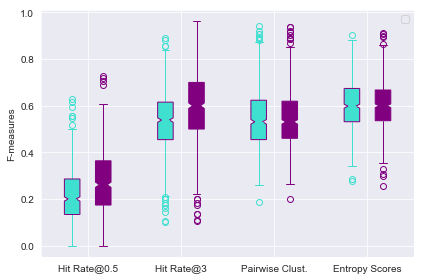

In [53]:
c = "turquoise"
plt.boxplot((est_df["HitRate_0.5F"], 
             est_df["HitRate_3F"],
             est_df["PWF"], 
             est_df["Sf"]),
            positions=[1, 4, 7, 10],
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color="purple"),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))

c2 = "purple"
box1 = plt.boxplot((ann_df["HitRate_0.5F"], 
             ann_df["HitRate_3F"],
             ann_df["PWF"], 
             ann_df["Sf"]),
            positions=[2, 5, 8, 11],
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=c2)
plt.setp(box1["boxes"], facecolor=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)

plt.legend()

plt.xticks([1.5, 4.5, 7.5, 10.5], ["Hit Rate@0.5", "Hit Rate@3", "Pairwise Clust.", "Entropy Scores"])
plt.xlim(0, 12)

plt.ylabel("F-measures")
plt.tight_layout()
plt.savefig("../paper/figs/segment_results.pdf")